Forecasting using ARIMA Model

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [5]:
#Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

Finding d for differencing in ARIMA model

In [14]:
data= df.value.dropna()

In [16]:
result= adfuller(data)[1]
print('P value of the series:', result)

print('P value of the first difference:', adfuller(data.diff().dropna())[1])

P value of the series: 0.12441935447109559
P value of the first difference: 0.07026846015272707


We can conclude that first difference is almost stationary

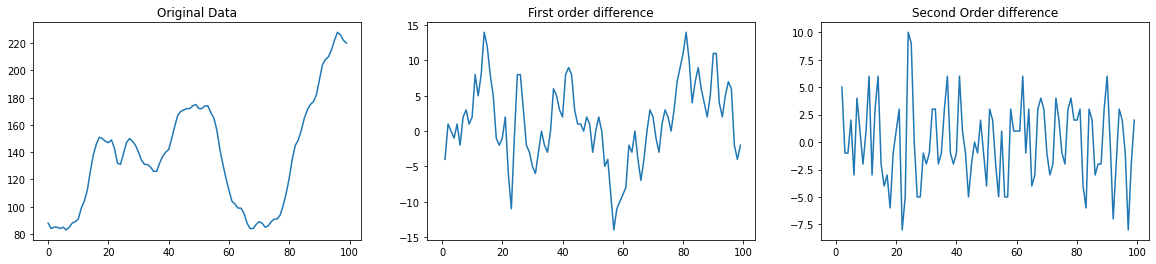

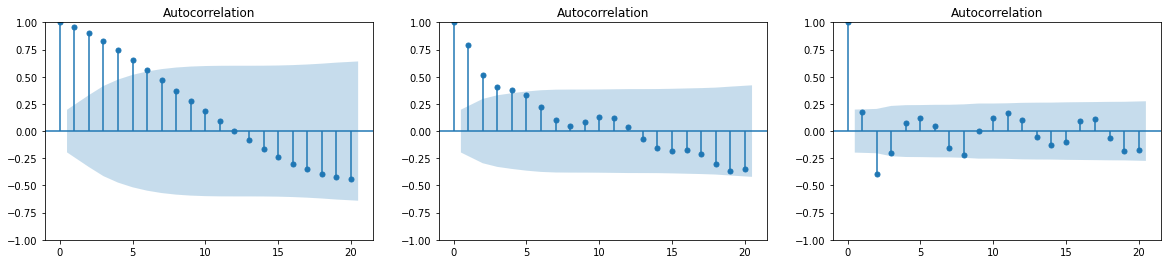

In [39]:
fig, axes= plt.subplots(1, 3, sharex= True, figsize= (20, 4))
data.plot(title= 'Original Data', ax= axes[0])
data.diff().dropna().plot(title= 'First order difference', ax= axes[1])
data.diff().dropna().diff().plot(title= 'Second Order difference', ax= axes[2])

fig, axes= plt.subplots(1, 3, sharex= True, figsize= (20, 4))
plot_acf(data, ax= axes[0]);
plot_acf(data.diff().dropna(), ax= axes[1]);
plot_acf(data.diff().dropna().diff().dropna(), ax= axes[2]);

From the autocorrelatin plot of second difference we can see that second lag value is quite negative which makes over difference. 

In [53]:
# Train test split
train= data[:85]
test= data[85:]

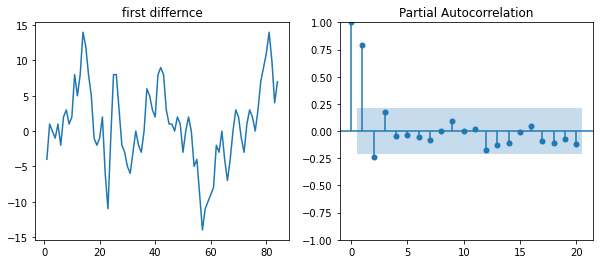

In [54]:
# To find the order of p in AR(P) model
fig, axes= plt.subplots(1, 2, figsize= (10, 4))
train.diff().plot(title= 'first differnce', ax= axes[0])
plot_pacf(train.diff().dropna(), method= 'ywm', ax= axes[1]);

We can see that pacf plot has significance upto 2 lags

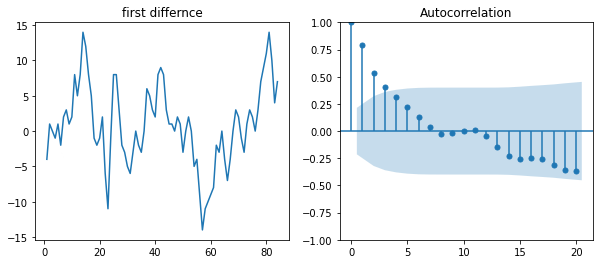

In [55]:
#To find q for MA(q) process
fig, axes= plt.subplots(1, 2, figsize= (10, 4))
train.diff().plot(title= 'first differnce', ax= axes[0])
plot_acf(train.diff().dropna(), ax= axes[1]);

We can see that acf plot is significance upto 3 lags but significance is high upto lag 2

In [49]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
# 1,1,1 ARIMA model
# Creating a very simple model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -217.055
Date:                Fri, 11 Feb 2022   AIC                            440.109
Time:                        22:08:43   BIC                            447.402
Sample:                             0   HQIC                           443.041
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597      0.097      6.790      0.000       0.469       0.850
ma.L1          0.4857      0.099      4.892      0.000       0.291       0.680
sigma2        10.1098      1.595      6.340      0.0

from p values we can conclude that all the orders are highlt significant.<br>
Forecasting the test data

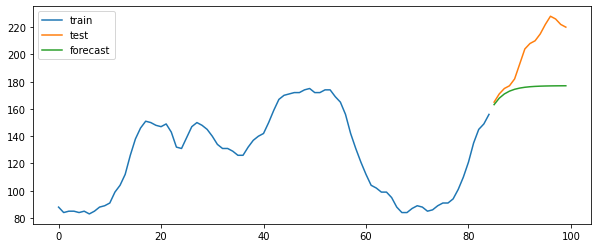

In [59]:
plt.figure(figsize= (10, 4))
plt.plot(train)
plt.plot(test)
plt.plot(model_fit.forecast(15))
plt.legend(['train', 'test', 'forecast'])

In [70]:
# ARIMA(3, 2, 1) model
model2= ARIMA(train, order= (3,2,1)).fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.430
Date:                Fri, 11 Feb 2022   AIC                            438.860
Time:                        22:18:13   BIC                            450.954
Sample:                             0   HQIC                           443.719
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1364      0.132      8.606      0.000       0.878       1.395
ar.L2         -0.5883      0.151     -3.897      0.000      -0.884      -0.292
ar.L3          0.3023      0.128      2.360      0.0

C:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


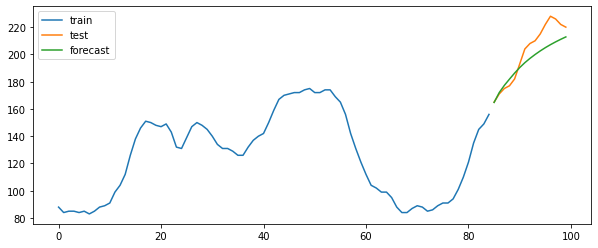

In [71]:
plt.figure(figsize= (10, 4))
plt.plot(train)
plt.plot(test)
plt.plot(model2.forecast(15))
plt.legend(['train', 'test', 'forecast'])

Better than the previous model